In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


In [34]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [35]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [36]:
y_pred = model.predict(X_test_vec)


In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9668161434977578


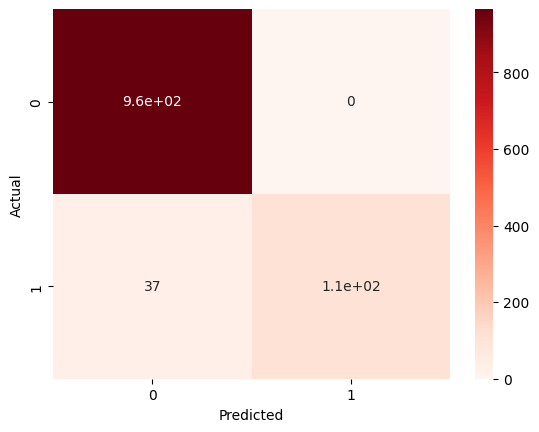

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
samples = [
    "you are winner in lottry offer by rummycircle",
    "Hey bro are we meeting tomorrow?",
    "URGENT! Claim your prize now",
    "Your bank account has been suspended, verify now"
]

samples_vec = vectorizer.transform(samples)
preds = model.predict(samples_vec)

for msg, p in zip(samples, preds):
    print(msg, "->", "Spam" if p == 1 else "Not Spam")


you are winner in lottry offer by rummycircle -> Spam
Hey bro are we meeting tomorrow? -> Not Spam
URGENT! Claim your prize now -> Spam
Your bank account has been suspended, verify now -> Not Spam
